# Data Exploration 2: Updated and Merged Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
updated_data_path = 'data/mmc2_updated.csv'
merged_data_path = 'data/merged.csv'
updated_data = pd.read_csv(updated_data_path)
merged_data = pd.read_csv(merged_data_path)

In [3]:
# Engineering Classification Label (1.0 represents no change compared to wild-type)
def label_type(row):
    if row['scaled_effect'] < .99:
        return('Deleterious')
    elif row['scaled_effect'] > 1.1:
        return('Beneficial')
    else:
        return('Netural')

# Convert to categorical characterization
merged_data['type'] = merged_data.apply(lambda row: label_type(row), axis=1)
updated_data['type'] = updated_data.apply(lambda row: label_type(row), axis=1)

## Exploration: Updated (No FEATURE Data)

In [4]:
updated_prots = updated_data.protein.unique()

In [9]:
### Distribution of Samples (Per Protein) ###
total_samples = 0

for protein in updated_prots:
    num_samples = updated_data[updated_data.protein == protein].shape[0]
    total_samples += num_samples
    print("{}: {}".format(protein, num_samples))

print("Total Samples:", total_samples)



TEM-1: 25909
Kka2: 21170
Uba1: 1511
PSD95pdz3: 1576
Pab1: 1188
Yap65: 373
hsp90: 170
gb1: 1025
Total Samples: 52922


In [13]:
### Distribution of Samples (Per Type) ###
for label in updated_data.type.unique():
    print('Number of {} Mutations: {}'.format(label, updated_data[updated_data.type == label].shape[0]))

Number of Deleterious Mutations: 33466
Number of Netural Mutations: 13598
Number of Beneficial Mutations: 5858


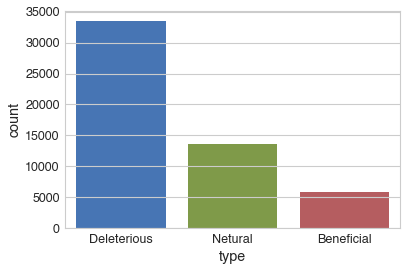

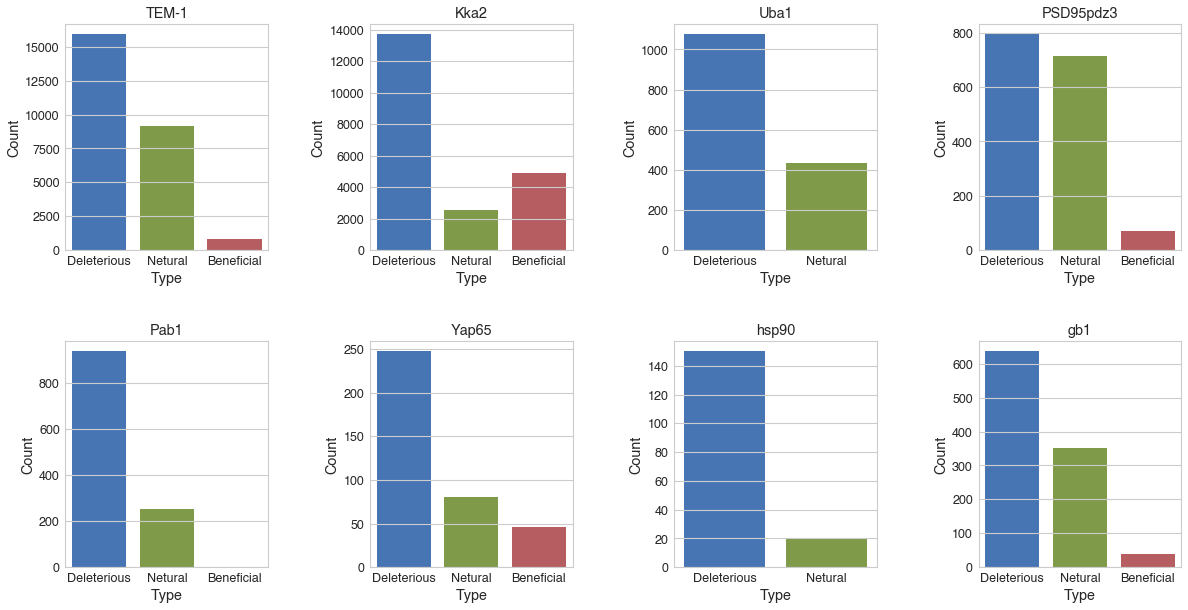

In [19]:
### Count Plots ###
### Categorical Counts ###

ax = sns.countplot(x = 'type', data=updated_data)


figure,ax = plt.subplots(2,4, figsize = (20,10))
figure.subplots_adjust(hspace = 0.4, wspace = 0.5)
i = 1

for protein in updated_prots:
    updated = updated_data[updated_data['protein'] == protein]
    if i <= 4:
        sns.countplot(x='type', data=updated, ax = ax[0][i-1])
        ax[0][i-1].set(xlabel='Type', ylabel='Count', title='{}'.format(protein))
    else:
        sns.countplot(x='type', data=updated, ax = ax[1][i-5])
        ax[1][i-5].set(xlabel='Type', ylabel='Count', title='{}'.format(protein))
    i += 1
    
plt.savefig('img/updated-counts-per-protein.png', dpi=300)

## Exploration: Merged Data (W/ FEATURE Vector Data)

In [5]:
merged_prots = merged_data.protein.unique()

In [6]:
### Distribution of Samples (Per Protein) ###
total_samples = 0

for protein in merged_prots:
    num_samples = merged_data[merged_data.protein == protein].shape[0]
    total_samples += num_samples
    print("{}: {}".format(protein, num_samples))

print("Total Samples:", total_samples)



TEM-1: 25140
Kka2: 20475
Uba1: 1364
PSD95pdz3: 1576
Pab1: 856
hsp90: 170
Total Samples: 49581


In [7]:
### Distribution of Samples (Per Type) ###
for label in merged_data.type.unique():
    print('Number of {} Mutations: {}'.format(label, merged_data[updated_data.type == label].shape[0]))

/Users/anthonyagbay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Number of Deleterious Mutations: 33466
Number of Netural Mutations: 13598
Number of Beneficial Mutations: 2517


/Users/anthonyagbay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


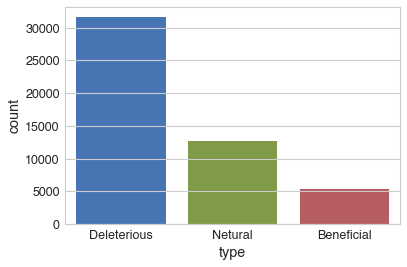

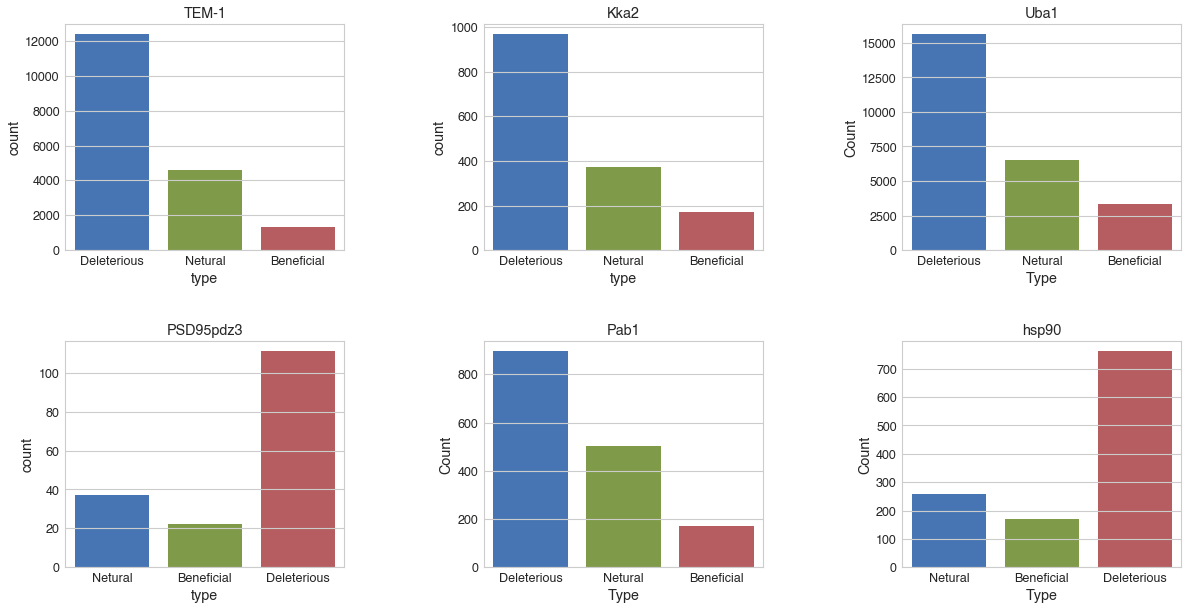

In [8]:
### Count Plots ###
### Categorical Counts ###

ax = sns.countplot(x = 'type', data= merged_data)


figure,ax = plt.subplots(2,3, figsize = (20,10))
figure.subplots_adjust(hspace = 0.4, wspace = 0.5)
i = 0

for protein in merged_prots:
    merged = merged_data[updated_data['protein'] == protein]
    if i < 3:
        sns.countplot(x='type', data= merged, ax = ax[0][i-1])
        ax[0][i].set(xlabel='Type', ylabel='Count', title='{}'.format(protein))
    else:
        sns.countplot(x='type', data= merged, ax = ax[1][i-5])
        ax[1][i-3].set(xlabel='Type', ylabel='Count', title='{}'.format(protein))
    i += 1
    
plt.savefig('img/merged-counts-per-protein.png', dpi=300)